# <center style="color:red">**The Spark Foundation -  #GRIPAPR21**</center> <br> <span style="color:blue">**Shreyas Gowda C**</span>
<span style="color:brown">**Task 1: Prediction using supevised ML**</span>

<span style="color:brown">***Task is to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.***</span>

### <span style="color:brown">--------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_csv = pd.read_csv("http://bit.ly/w-data")
data_csv.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
#info() method gives information like no of rows and columns in the dataset along with their datatype
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#describe() method is used to view the statistical summary of all the numerical cols in the dataset
data_csv.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
# Check if there is any null values in the datasets
print(data_csv.isnull == True)
print(data_csv.isnull().sum())

False
Hours     0
Scores    0
dtype: int64


<span style="color:red"> **There is no null values in the data set**</span>

In [21]:
data_csv.shape

(25, 2)

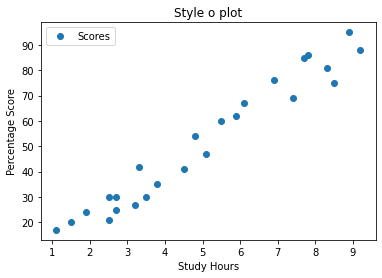

In [58]:
# Plotting the distribution of score
data_csv.plot(x='Hours',y='Scores',style='o')
plt.title('Style o plot')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.show()

Text(0.5, 1.0, 'Relationship between Study Hours and Percentage Scores')

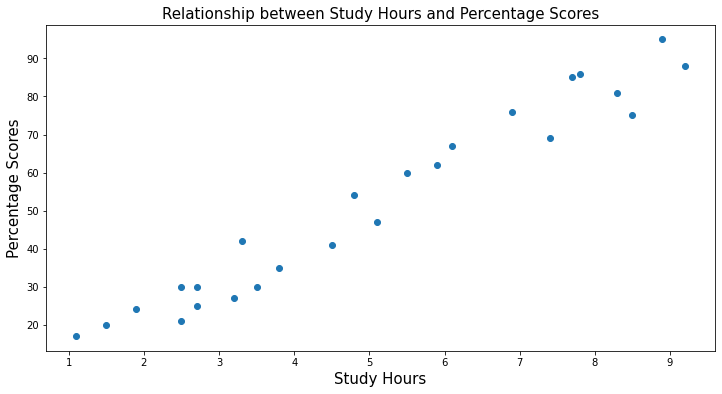

In [94]:
plt.figure(figsize=(12,6))
plt.scatter(data_csv['Hours'],data_csv['Scores'])
plt.xlabel('Study Hours',size = 15)
plt.ylabel('Percentage Scores',size=15)
plt.title('Relationship between Study Hours and Percentage Scores',size=15)

In [61]:
import seaborn as sns

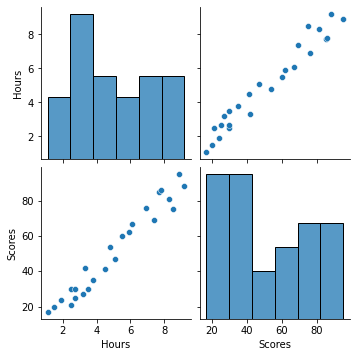

In [50]:
sns.pairplot(data_csv)

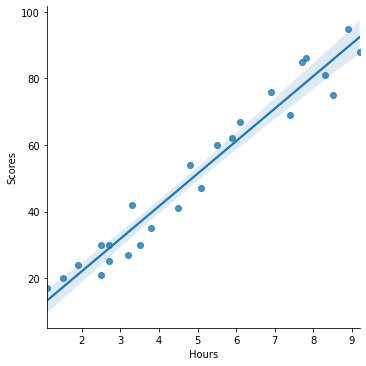

In [71]:
sns.lmplot(x='Hours',y='Scores',data=data_csv)

In [62]:
#Seperating the predictor and the outcome variables
X = data_csv['Hours']
y = data_csv['Scores']

In [72]:
#import the train_test_split model
from sklearn.model_selection import train_test_split
#import the linear regression model
from sklearn.linear_model import LinearRegression

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
#create an instance of the model and fit it on the training set
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [97]:
#Fitting the model creates a straight line which has following slope and y-intercept 
print(f'Coefficient: {model.coef_}')
print(f'Y-intercept: {model.intercept_}')

Coefficient: [9.91065648]
Y-intercept: 2.018160041434683


Text(0, 0.5, 'Percentage Scores')

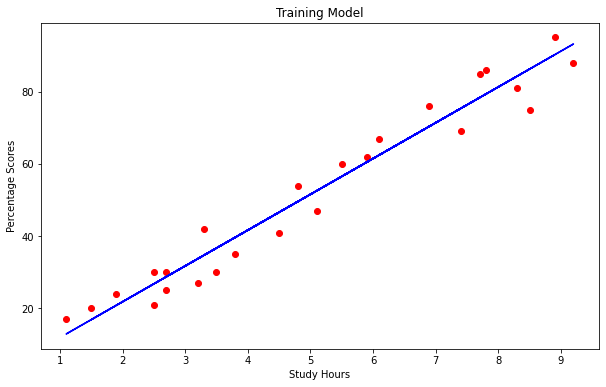

In [98]:
plt.figure(figsize=(10,6))
line = model.coef_*X+model.intercept_
plt.scatter(X,y,color = 'red')#plotting actual training set
plt.plot(X,line,color = 'blue')#plotting the line our model has created 
plt.title('Training Model')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')

In [99]:
pred = model.predict(X_test.values.reshape(-1,1))
pd.DataFrame({"Actual":y_test,'Predicted':pred})

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Text(0, 0.5, 'Percentage Scores')

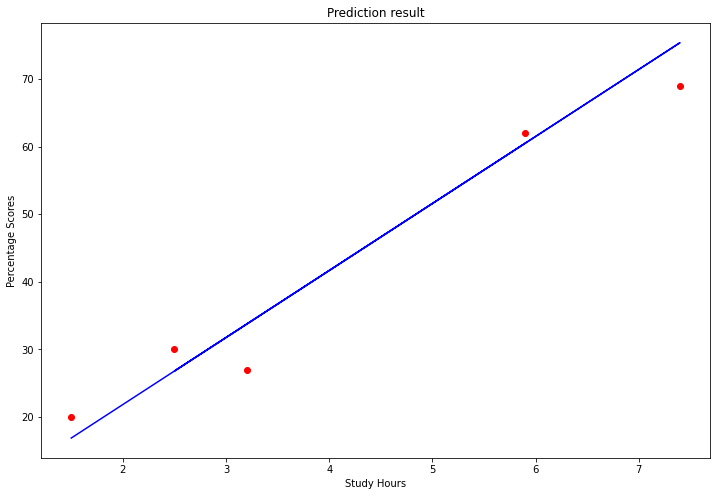

In [109]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,color = 'red')#plotting actual test set
plt.plot(X_test,pred,color = 'blue')#plotting predicted values 
plt.title('Prediction result')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')

In [101]:
new_pred = model.predict([[9.25]])
new_pred

array([93.69173249])

In [88]:
#import all the evaluation metrices
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('r2score: ',r2_score(y_test,pred))
print('mae:',mean_absolute_error(y_test,pred))
print('mse:',mean_squared_error(y_test,pred))
print('rmse:',np.sqrt(mean_absolute_error(y_test,pred)))

r2score:  0.8999124290533055
mae: 5.864954643694258
mse: 41.63486564552886
rmse: 2.4217668433799027


### <span style="color:brown">--------------------------------------------------------------------------------------------------------------------------------------------------------------</span>